In [35]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [13]:
df = pd.read_csv('int.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [14]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [16]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [22]:
df['Stage'].value_counts()

Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64

In [18]:
df.shape

(25000, 19)

In [19]:
df['Hepatomegaly'].value_counts()

Hepatomegaly
N    15243
Y     9757
Name: count, dtype: int64

In [20]:
df['age_y'] = df['Age'] // 365
df.drop(columns=['Age'], axis=1, inplace=True)
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age_y
0,2221,C,Placebo,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50
1,1230,C,Placebo,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54
2,4184,C,Placebo,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32
3,2090,D,Placebo,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45
4,2105,D,Placebo,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59


<Axes: ylabel='Frequency'>

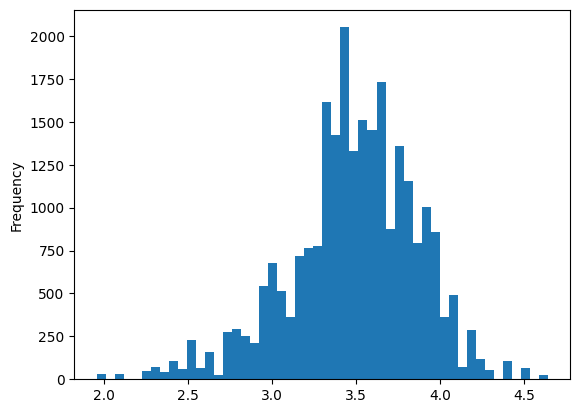

In [21]:
df['Albumin'].plot(kind='hist', bins=50)

In [29]:
fe = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 4]
print(fe)

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [ ]:
"Note: LabelEncoder() assigns integers in alphabetical order of categories"
df['Status'].value_counts(), df['Drug'].value_counts(), df['Sex'].value_counts(), df['Ascites'].value_counts(), df['Spiders'].value_counts(), df['Edema'].value_counts()


(Status
 C     13516
 D      9456
 CL     2028
 Name: count, dtype: int64,
 Drug
 Placebo            15827
 D-penicillamine     9173
 Name: count, dtype: int64,
 Sex
 F    22137
 M     2863
 Name: count, dtype: int64,
 Ascites
 N    16798
 Y     8202
 Name: count, dtype: int64,
 Spiders
 N    13614
 Y    11386
 Name: count, dtype: int64,
 Edema
 N    20220
 S     3698
 Y     1082
 Name: count, dtype: int64)

In [36]:
label_col = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
le = LabelEncoder()

for i in label_col:
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age_y
0,2221,0,1,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50
1,1230,0,1,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54
2,4184,0,1,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32
3,2090,2,1,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45
4,2105,2,1,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  int32  
 2   Drug           25000 non-null  int32  
 3   Sex            25000 non-null  int32  
 4   Ascites        25000 non-null  int32  
 5   Hepatomegaly   25000 non-null  int32  
 6   Spiders        25000 non-null  int32  
 7   Edema          25000 non-null  int32  
 8   Bilirubin      25000 non-null  float64
 9   Cholesterol    25000 non-null  float64
 10  Albumin        25000 non-null  float64
 11  Copper         25000 non-null  float64
 12  Alk_Phos       25000 non-null  float64
 13  SGOT           25000 non-null  float64
 14  Tryglicerides  25000 non-null  float64
 15  Platelets      25000 non-null  float64
 16  Prothrombin    25000 non-null  float64
 17  Stage          25000 non-null  int64  
 18  age_y 

<Axes: xlabel='Stage', ylabel='Cholesterol'>

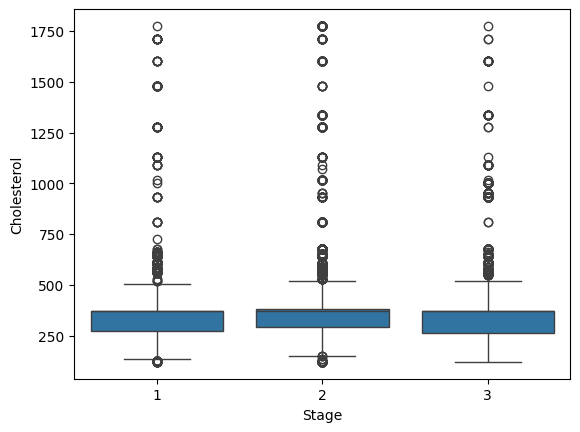

In [40]:
sn.boxplot(x='Stage', y='Cholesterol', data=df)

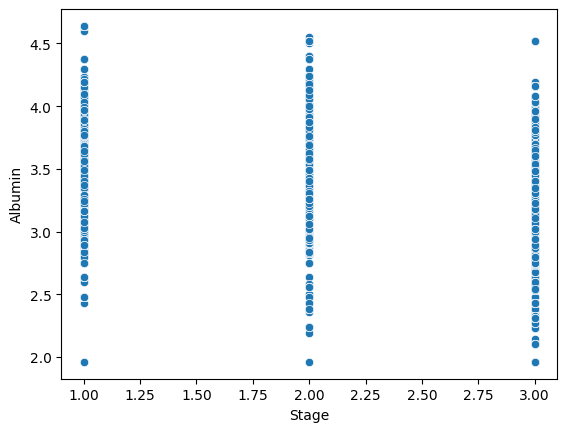

In [52]:
sn.scatterplot(data=df, x='Stage' ,y='Albumin')
plt.show()

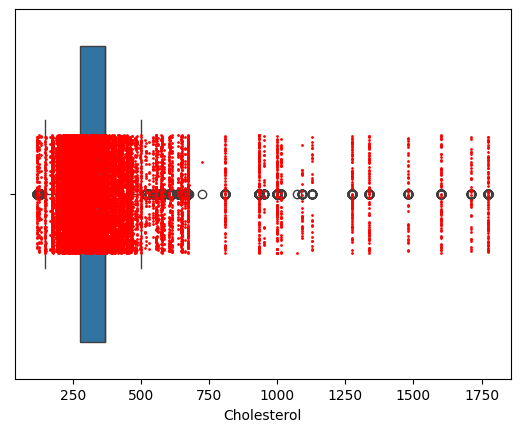

In [49]:
sn.boxplot(data=df, x='Cholesterol')
sn.stripplot(data=df, x='Cholesterol', color='red', jitter=0.16, size=2)
plt.show()

<Axes: xlabel='Copper'>

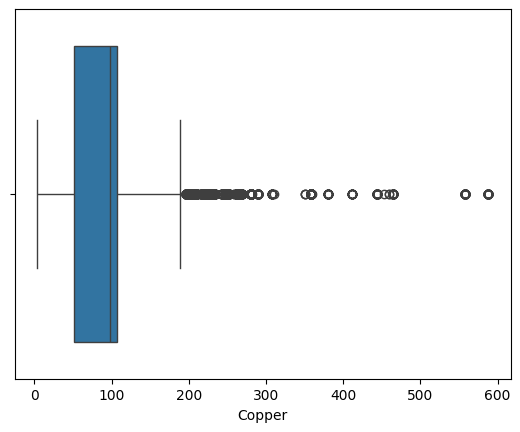

In [55]:
sn.boxplot(data=df,x='Copper')

<Axes: xlabel='Stage', ylabel='Tryglicerides'>

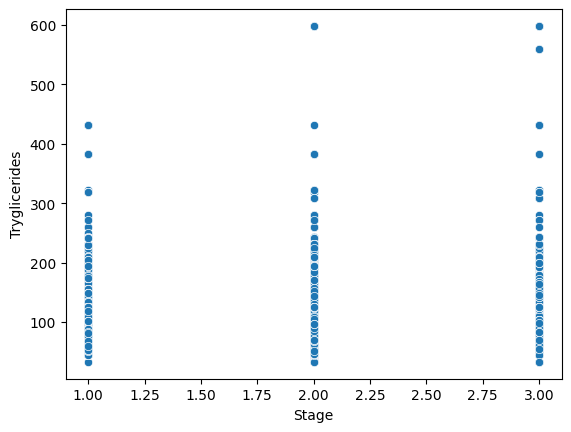

In [57]:
sn.scatterplot(data=df, x='Stage',y='Tryglicerides')

<Axes: xlabel='Stage', ylabel='Platelets'>

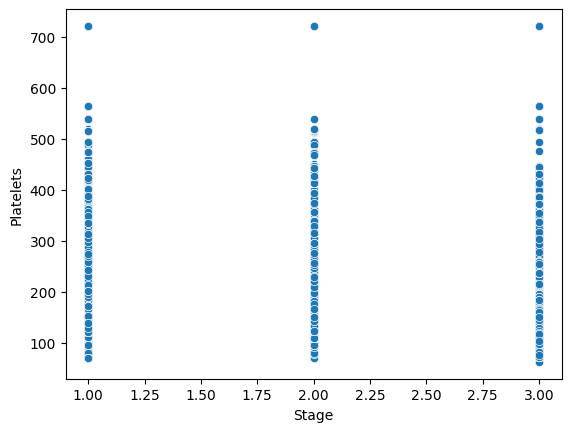

In [58]:
sn.scatterplot(data=df,x='Stage', y='Platelets')

In [59]:
df['Platelets'] = df['Platelets'].clip(upper=580)

<Axes: xlabel='Stage', ylabel='Platelets'>

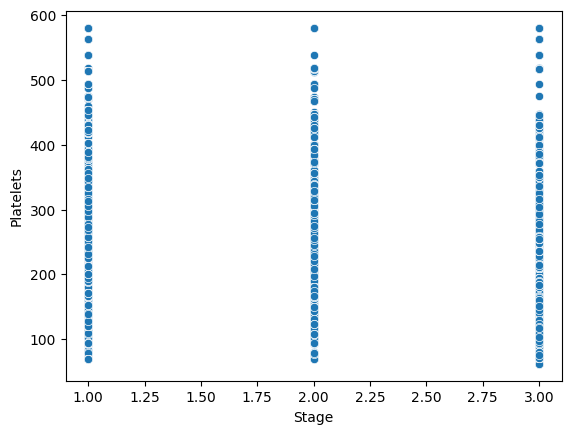

In [60]:
sn.scatterplot(data=df,x='Stage', y='Platelets')

<Axes: xlabel='Prothrombin'>

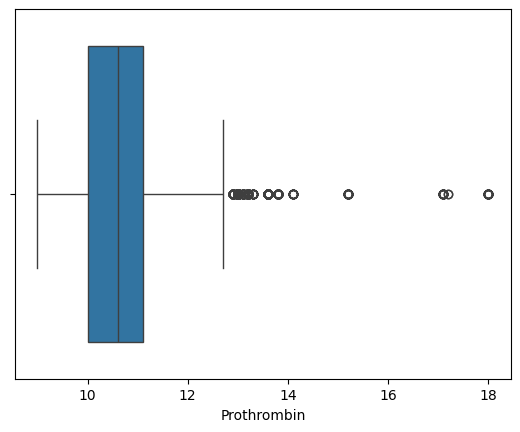

In [61]:
sn.boxplot(data=df, x='Prothrombin')

In [65]:
df.head()


,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,age_y
0,2221,0,1,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50
1,1230,0,1,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54
2,4184,0,1,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32
3,2090,2,1,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45
4,2105,2,1,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  int32  
 2   Drug           25000 non-null  int32  
 3   Sex            25000 non-null  int32  
 4   Ascites        25000 non-null  int32  
 5   Hepatomegaly   25000 non-null  int32  
 6   Spiders        25000 non-null  int32  
 7   Edema          25000 non-null  int32  
 8   Bilirubin      25000 non-null  float64
 9   Cholesterol    25000 non-null  float64
 10  Albumin        25000 non-null  float64
 11  Copper         25000 non-null  float64
 12  Alk_Phos       25000 non-null  float64
 13  SGOT           25000 non-null  float64
 14  Tryglicerides  25000 non-null  float64
 15  Platelets      25000 non-null  float64
 16  Prothrombin    25000 non-null  float64
 17  Stage          25000 non-null  int64  
 18  age_y 

In [67]:
df.to_csv('Clenned_dataset.csv', index=False)